In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
df = pd.read_csv(r"C:\Users\abhay\OneDrive\Desktop\creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
df.duplicated().sum()

1081

In [5]:
# Check for duplicates
duplicates = df[df.duplicated(keep=False)]


# Remove duplicates
df_no_duplicates = df.drop_duplicates()

# Display the DataFrame without duplicates
df_no_duplicates

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
df_no_duplicates.duplicated().sum()

0

C:\Users\abhay\AppData\Local\Temp\ipykernel_19720\4019359740.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(3, 3))


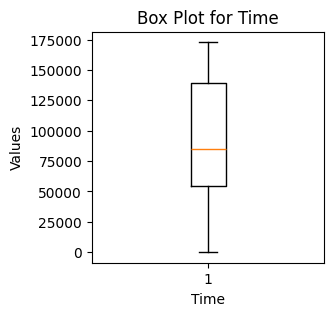

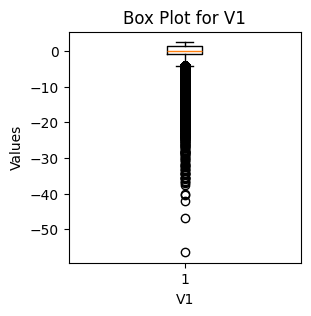

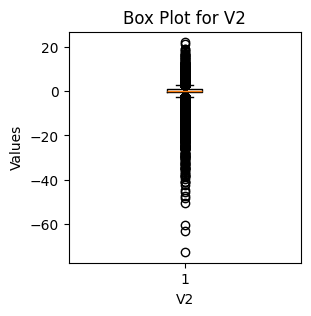

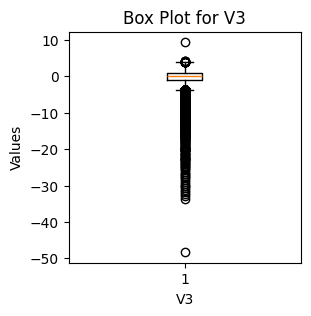

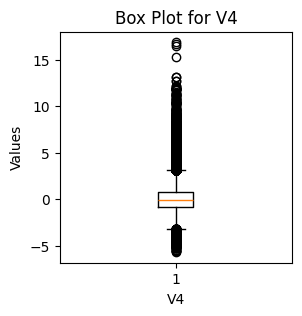

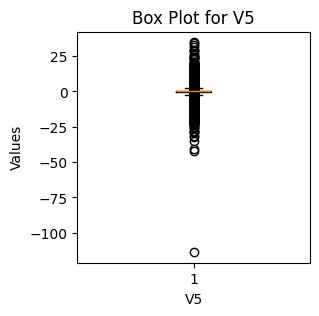

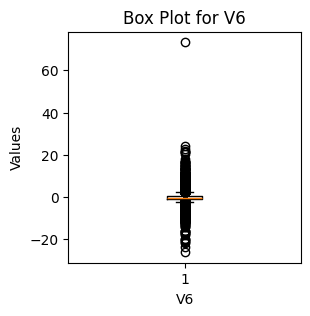

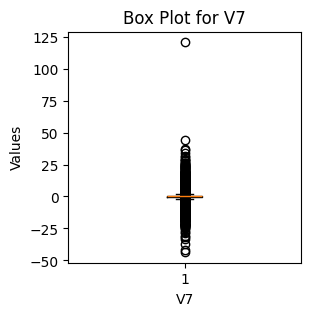

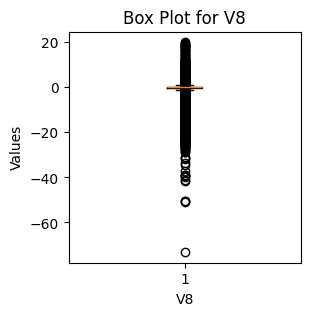

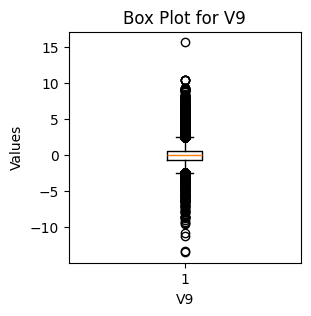

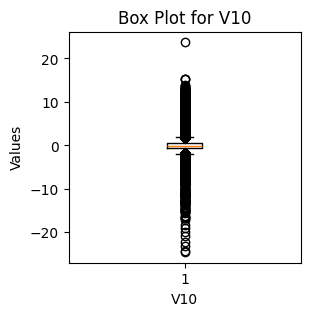

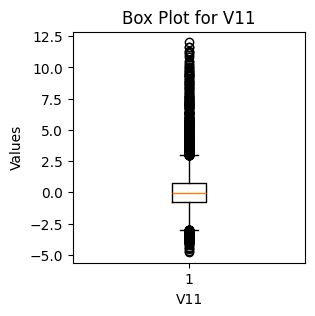

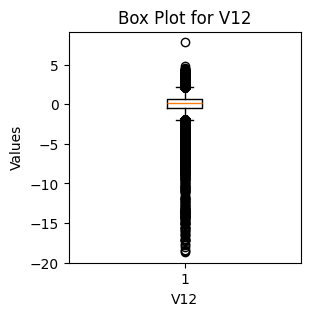

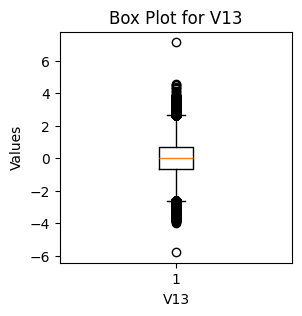

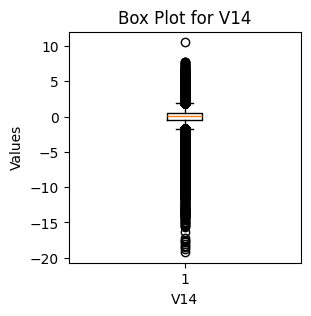

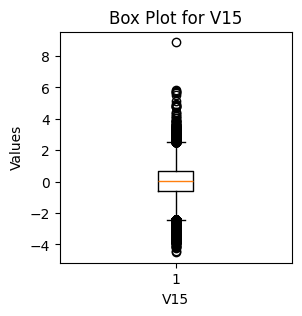

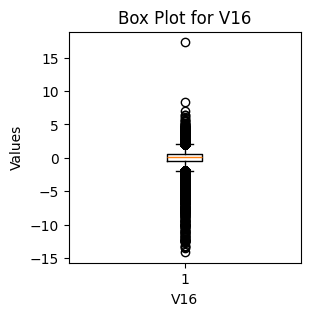

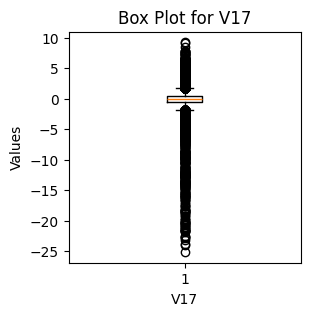

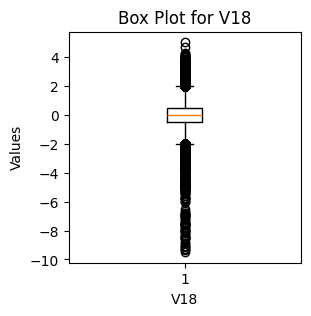

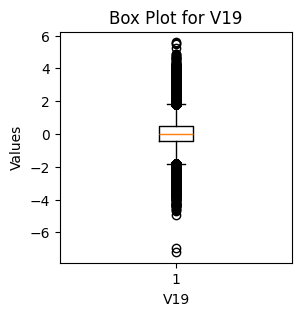

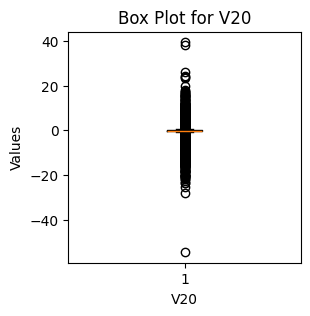

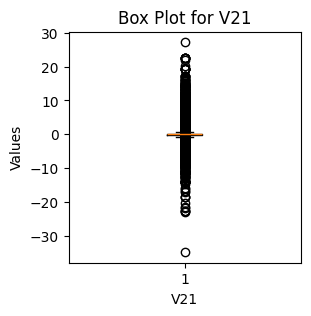

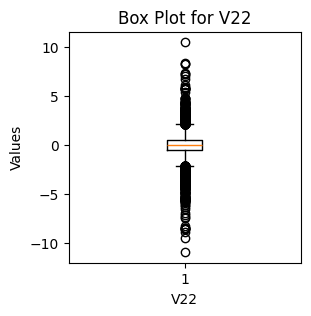

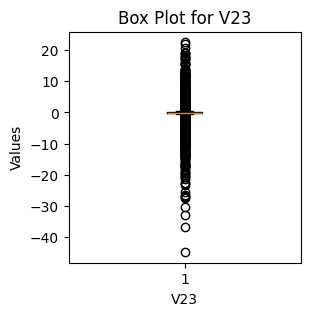

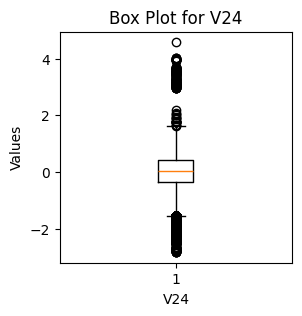

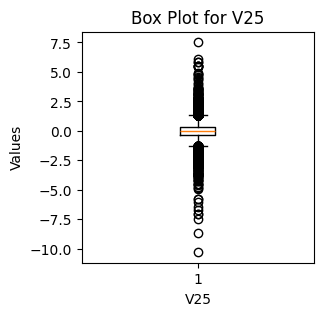

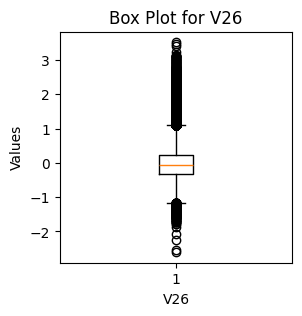

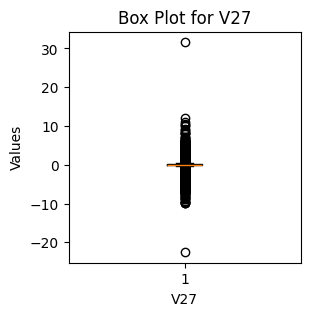

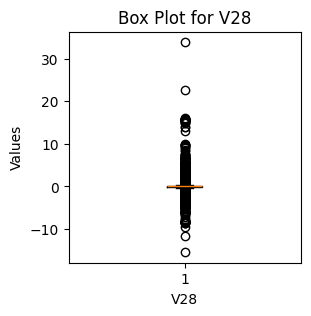

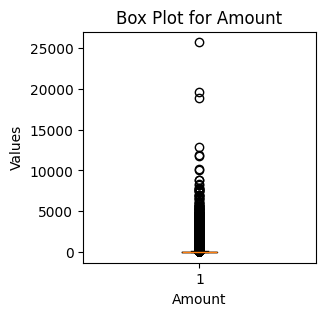

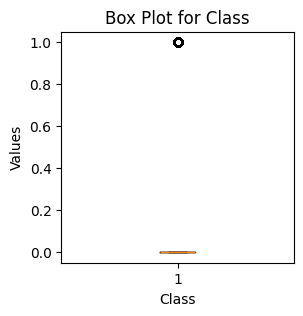

In [7]:
# Select numeric columns
numeric_columns = df_no_duplicates.select_dtypes(include='number')

# Create box plots for all numeric columns
for column in numeric_columns.columns:
    plt.figure(figsize=(3, 3))
    plt.boxplot(numeric_columns[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Values')
plt.show()  

In [8]:
X = df_no_duplicates.drop(['Class'], axis=1)
y = df_no_duplicates['Class']

In [9]:
# Scale the features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Perform oversampling using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [12]:
# # Select numeric columns
# numeric_columns = df_no_duplicates.select_dtypes(include='number')

# # Create box plots for all numeric columns
# for column in X_res.columns:
#     plt.figure(figsize=(3, 3))
#     plt.boxplot(numeric_columns[column])
#     plt.title(f'Box Plot for {column}')
#     plt.xlabel(column)
#     plt.ylabel('Values')
# plt.show() 

In [13]:
y_resampled.value_counts()

Class
0    198269
1    198269
Name: count, dtype: int64

In [ ]:
# Define the classifiers and their hyperparameter grids
classifiers = {
    'Random Forest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 10, 20],
        }
    },
    'SVM': {
        'model': SVC(),
        'param_grid': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7],
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(),
        'param_grid': {
            'C': [0.1, 1, 10],
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'max_depth': [None, 10, 20],
        }
    },
    'Gaussian Naive Bayes': {
        'model': GaussianNB(),
        'param_grid': {}
    }
}

# Model evaluation and metrics
results = {}
for name, config in classifiers.items():
    clf = config['model']
    param_grid = config['param_grid']

    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    # Cross-validation scores
    cv_scores = cross_val_score(best_model, X_resampled, y_resampled, cv=5, scoring='accuracy')

    # Evaluate on the test set
    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        'best_model': best_model,
        'best_params': grid_search.best_params_,
        'mean_cv_accuracy': np.mean(cv_scores),
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm,
    }

# Print the results
for name, result in results.items():
    print(f'{name}:')
    print(f'Best Parameters: {result["best_params"]}')
    print(f'Mean Cross-Validation Accuracy: {result["mean_cv_accuracy"]}')
    print(f'Accuracy on Test Set: {result["accuracy"]}')
    print(f'Precision: {result["precision"]}')
    print(f'Recall: {result["recall"]}')
    print(f'F1 Score: {result["f1_score"]}')
    print(f'Confusion Matrix:\n{result["confusion_matrix"]}\n')

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Loop through classifiers
for name, result in results.items():
    best_model = result['best_model']
    
    # Calculate learning curves for the best model of each classifier
    train_sizes, train_scores, test_scores = learning_curve(best_model, X_resampled, y_resampled, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    plt.figure()
    plt.title(f"Learning Curves for {name}")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()

    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")

    plt.legend(loc="best")
plt.show()

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Loop through classifiers
for name, result in results.items():
    values = [result['accuracy'], result['precision'], result['recall'], result['f1_score']]

    plt.figure()
    plt.bar(metrics, values)
    plt.xlabel('Metric')
    plt.ylabel('Score')
    plt.title(f'Model Evaluation Metrics for {name}')
plt.show()